In [1]:
# Importowanie potrzebnych bibliotek i modułów
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Tworzenie zbioru danych
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Podział danych na zbiory uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Tworzenie modelu sieci neuronowej
model = Sequential([
    Dense(32, activation='relu', input_dim=2),  # Warstwa ukryta z 32 neuronami i funkcją aktywacji ReLU
    Dense(1, activation='sigmoid')  # Warstwa wyjściowa z 1 neuronem i funkcją aktywacji sigmoidalną
])

In [4]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Trenowanie modelu
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 6s 12ms/step - loss: 0.4872 - accuracy: 0.7775 - val_loss: 0.3822 - val_accuracy: 0.8325
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3885 - accuracy: 0.8299 - val_loss: 0.3527 - val_accuracy: 0.8425
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3772 - accuracy: 0.8347 - val_loss: 0.3462 - val_accuracy: 0.8440
Epoch 4/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3711 - accuracy: 0.8374 - val_loss: 0.3407 - val_accuracy: 0.8475
Epoch 5/10
250/250 [==============================] - 3s 13ms/step - loss: 0.3650 - accuracy: 0.8411 - val_loss: 0.3352 - val_accuracy: 0.8505
Epoch 6/10
250/250 [==============================] - 2s 8ms/step - loss: 0.3585 - accuracy: 0.8428 - val_loss: 0.3314 - val_accuracy: 0.8550
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3528 - accuracy: 0.8461 - val_loss: 0.3271 - val_accuracy: 0.8580
Epoc

In [6]:
# Ocena modelu na danych testowych
_, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8551


313/313 [==============================] - 3s 7ms/step


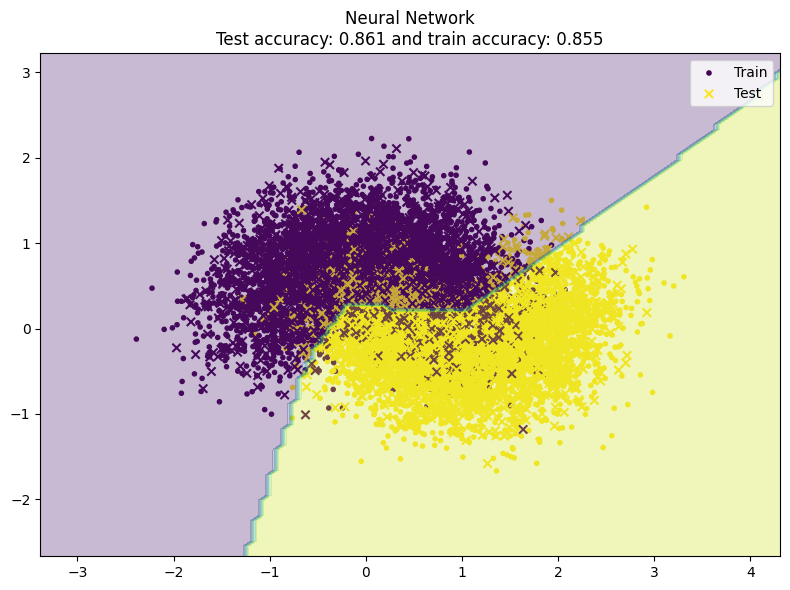

In [7]:
# Rysowanie granicy decyzyjnej dla sieci neuronowej
plt.figure(figsize=(8, 6))

# Rysowanie punktów danych treningowych
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.', label='Train')

# Rysowanie punktów danych testowych
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')

# Tworzenie siatki punktów dla wykresu konturu decyzji
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Dokonanie predykcji na punktach siatki
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Wstępna wizualizacja predykcji
Z = np.round(Z).reshape(xx.shape)

# Rysowanie konturu decyzji
plt.contourf(xx, yy, Z, alpha=0.3)

# Ustawienie tytułu wykresu
plt.title(f"Neural Network\nTest accuracy: {test_accuracy:.3f} and train accuracy: {train_accuracy:.3f}")

# Dodanie legendy
plt.legend()

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()